# **Report**
# **Liefertreue Analyse: Ein datengetriebener Ansatz**

Student name: Priscila Strömsdörfer - ps178@hdm-stuttgart.de

---

In [1]:
from IPython.display import Image, Markdown, display

## **Einführung und Daten**

### **Projektziel:**  
Das Ziel dieses Projekts ist es, Einblicke in die Liefertreue zu gewinnen, die wichtigsten Einflussfaktoren zu identifizieren und Optimierungsvorschläge für Supply-Chain-Prozesse zu entwickeln.

### **Motivation**
Die Sicherstellung der Lieferzuverlässigkeit in der Automobilindustrie ist entscheidend. Probleme mit der Liefertermintreue können Produktionsprozesse stören und die Effizienz der Lieferkette beeinträchtigen. Datenbasierte Analysen sollen helfen, Schwachstellen zu identifizieren und Optimierungspotenziale zu erkennen.

Beispiel:
Ein wichtiger Lieferant für Radlager meldet einen Lieferverzug von drei Tagen aufgrund logistischer Probleme. Die Montage der Fahrzeuge muss gestoppt werden, da die benötigten Teile fehlen. Dies verursacht direkte Produktionskosten und Verzögerungen bei der Auslieferung der Fahrzeuge. In vernetzten Lieferketten können solche Verzögerungen dominoartige Auswirkungen haben, die zu Umsatzverlusten und geringerer Kundenzufriedenheit führen.

### **Research Question**
Welche Faktoren beeinflussen die Liefertermintreue bei produktiven Materialien, und wie können diese Informationen genutzt werden, um zukünftige Abweichungen zu minimieren?

### **Datengrundlage:**  
Der zugrunde liegende Datensatz besteht aus Dummy-Daten, die auf realistischen Szenarien basieren.
Datenübersicht:
 - 30.000 Einträge vor Datenbereinigung und Plausibilisierung.
 - Bereinigt: 28.924 Datensätze und 28.869 Lieferscheinnummern.
 - Zeitraum: 01.01.2024 bis 31.12.2024.
 - 21 Lieferanten, 32 Materialien, vertreten in 8 Ländern.

**Schlüsselvariablen:**
 - soll_menge & we_menge: Bestellte und gelieferte Mengen.
 - lieferdatum_soll & wareneingangsdatum_we: Geplante und tatsächliche Lieferdaten.
 - liefertreue: Zielvariable (Ja/Nein).
 - Abgeleitete Variablen: verspätungstage, termintreue, jahreszeit
 - otd_rate: On-Time Delivery: Anteil der pünktlich gelieferten Bestellungen
 - otif_rate: On-Time In-Full: Anteil der pünktlich und vollständig gelieferten Bestellungen

### **Datenqualität**
- 846 doppelte Einträge wurden entfernt (gespeichert unter: ../data/processed/duplicates_dataset.xlsx).
- 230 Datenanomalien (Datumsfelder) wurden identifiziert (gespeichert unter: ../data/processed/anomalien_dataset_liefertreue_2024.xlsx).

### **Bemerkungen zur Datenquelle**
Die Daten basieren auf SAP-Systemen (EKKO, EKPO, EKBE, LIKP, etc.). Es handelt sich um Dummy-Daten, die realistische Szenarien nachbilden und mit künstlicher Intelligenz generiert wurden. Die Daten enthalten keine vertraulichen Informationen.

### **Datenanalyse**

#### **Liefertreue Anteil**

- 85,07% OTD-Rate (pünktlich geliefert).
- 2,12% OTIF-Rate (pünktlich & vollständig).

Interpretation:
Eine OTIF-Rate von nur 2,12% deutet auf signifikante Probleme in der Lieferkette hin, wie Mengenabweichungen oder verspätete Lieferungen.

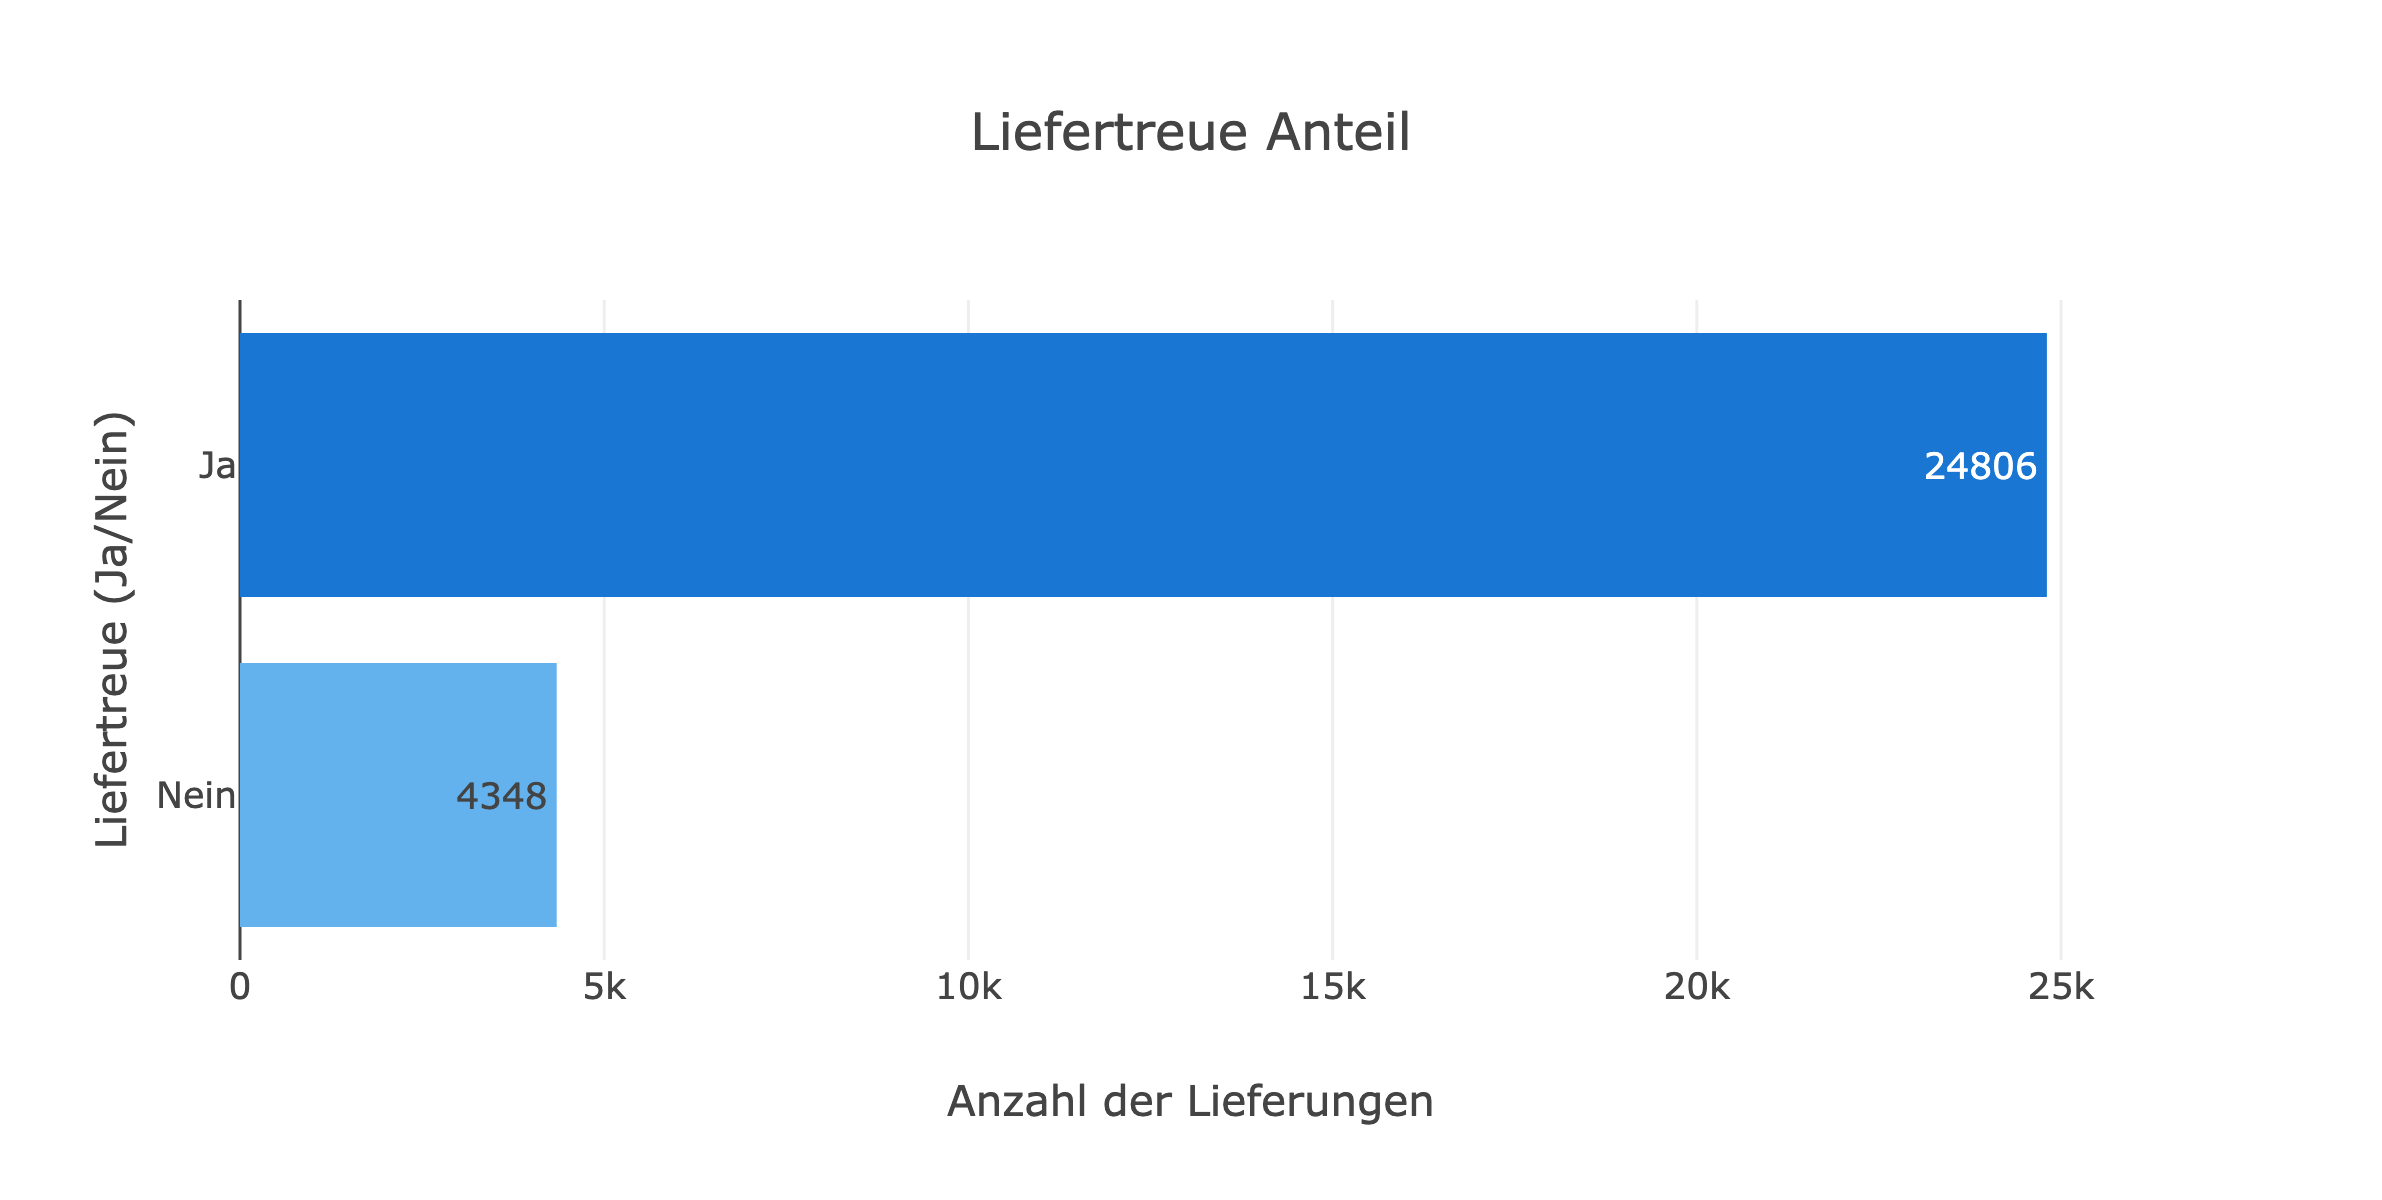

In [2]:
display(Image(filename="../reports/images/liefertreue_anteil.png", width=600, height=200))

#### Top 10 Materialien mit den meisten verspäteten Lieferungen

Diese Grafik listet die Materialien, die am häufigsten verspätet geliefert wurden. Spitzenreiter ist Material A2010580 mit 151 Verspätungen.

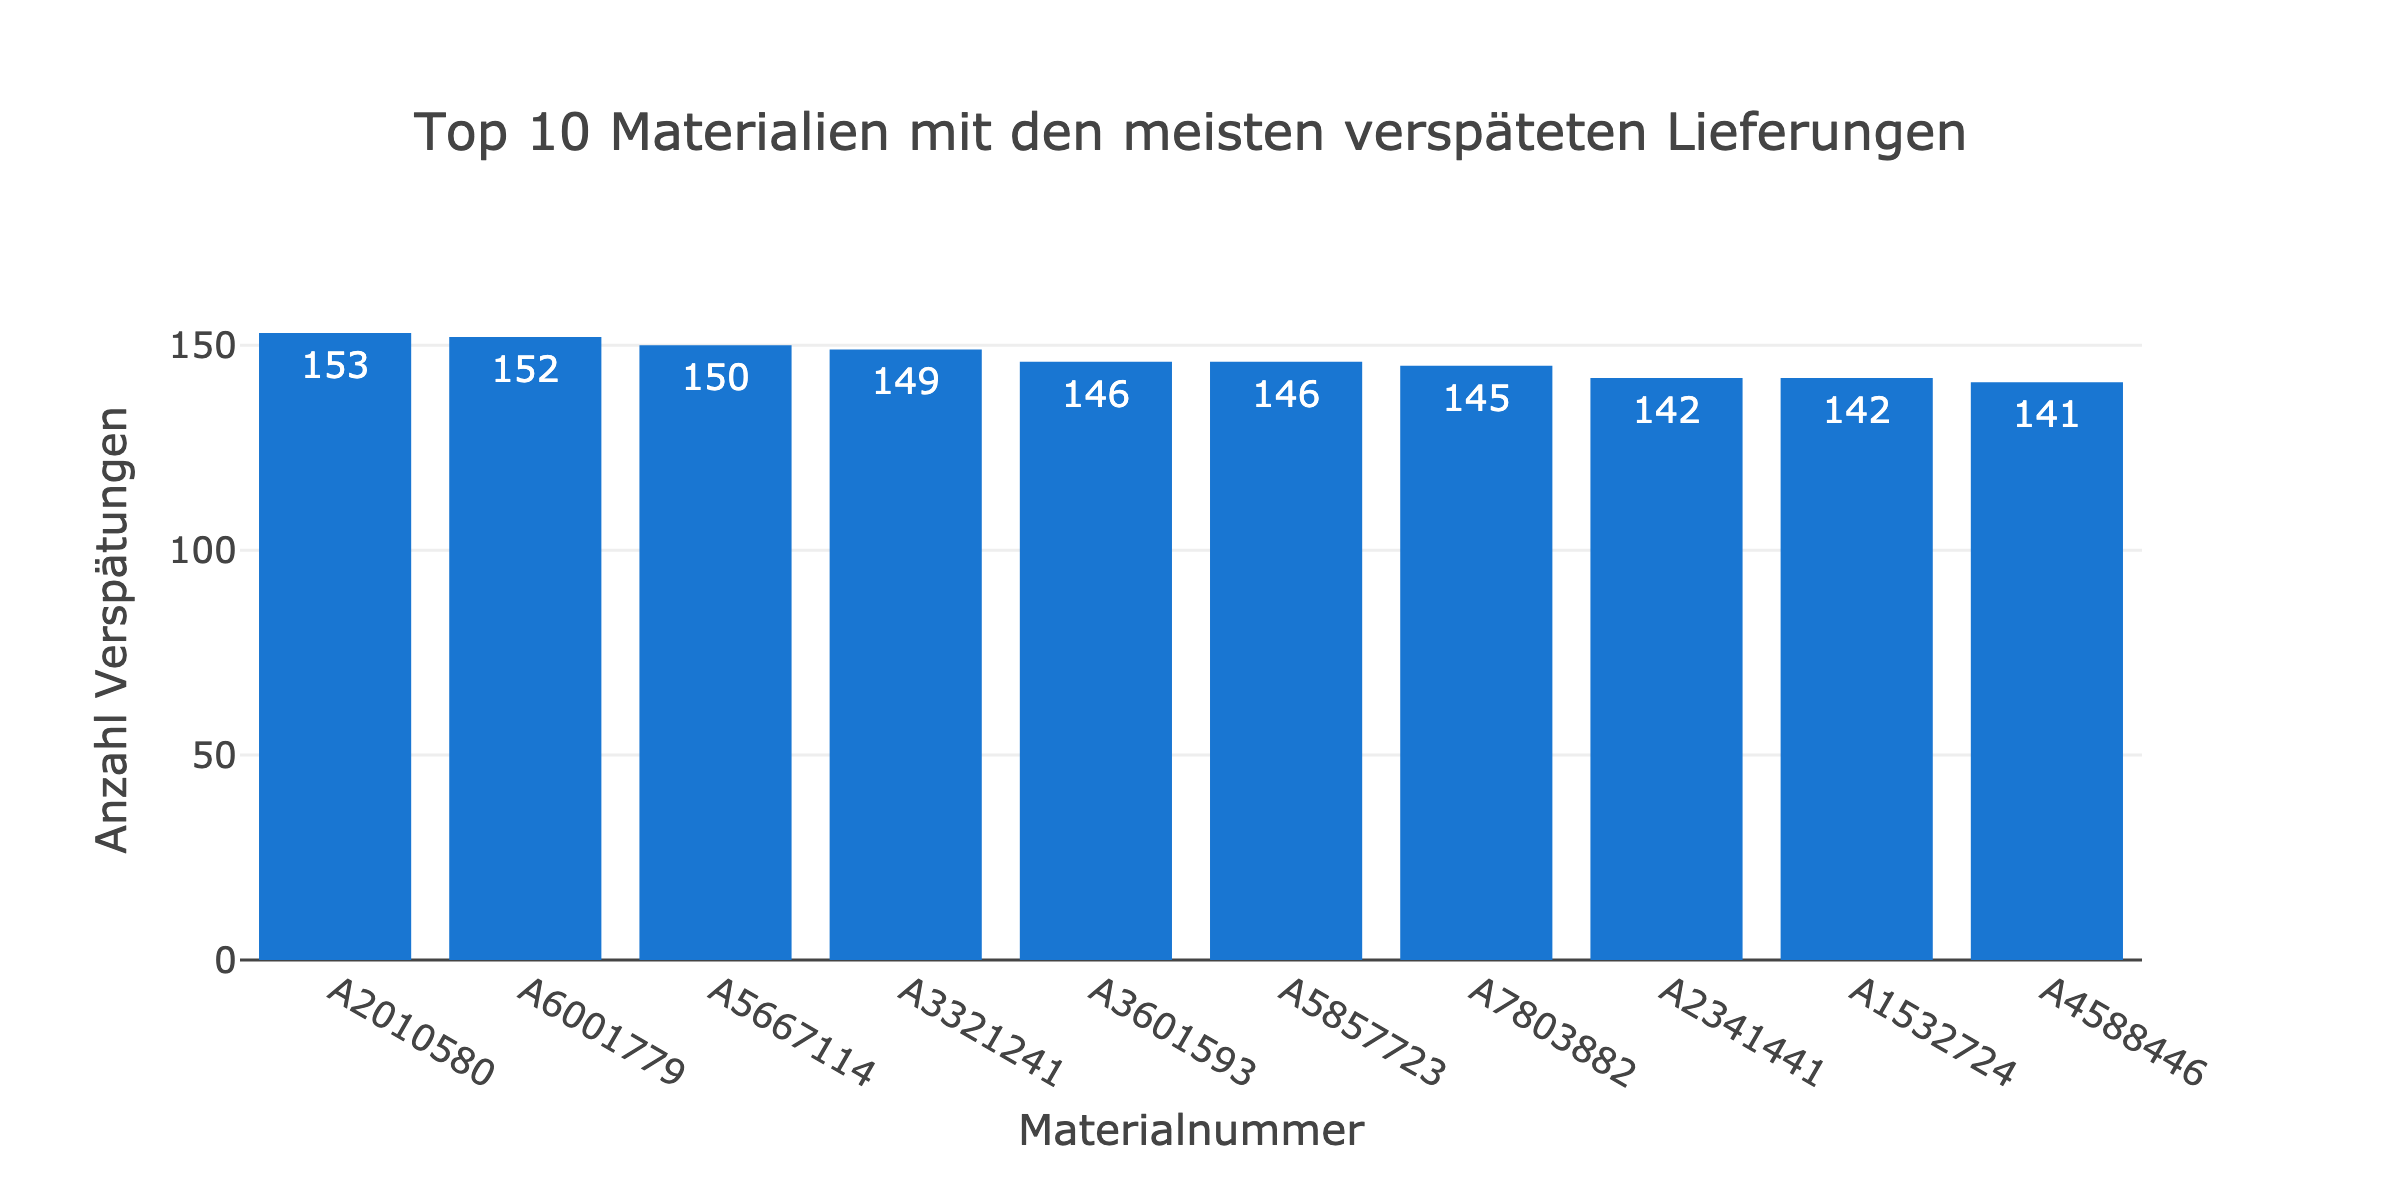

In [3]:
display(Image(filename="../reports/images/top_10_verspätungen_bar.png", width=600, height=200))

### Lieferperformance Top 10 - Kritische Lieferanten

Die Grafik zeigt die Liefertreue der 10 kritischsten Lieferanten in den letzten 6 Monaten. Es wird deutlich, dass einige Lieferanten stärkere Schwankungen aufweisen.

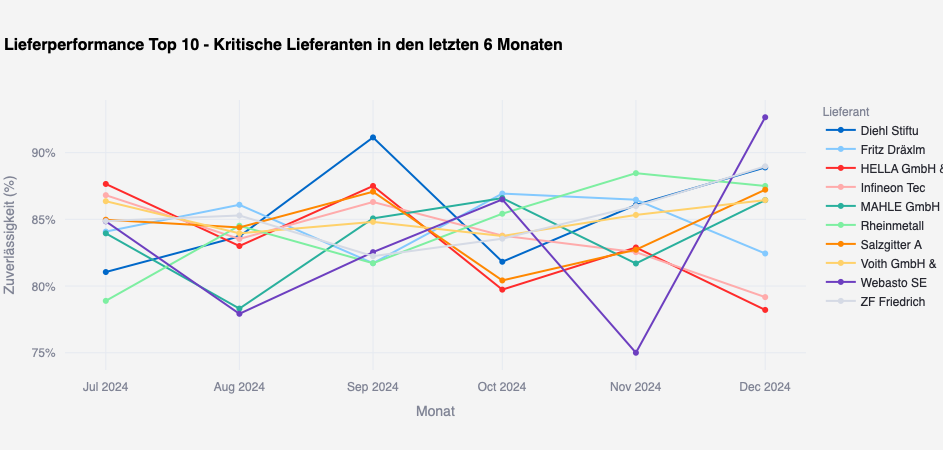

In [4]:
display(Image(filename="../reports/images/newplot-4.png", width=600, height=200))

### Top 10 Lieferanten mit den höchsten Anteilen verspäteter Lieferungen

Diese Grafik zeigt, welche Lieferanten den höchsten Anteil an verspäteten Lieferungen aufweisen. Salzgitter A hat die schlechteste Liefertreue mit 16,11% verspäteten Lieferungen.

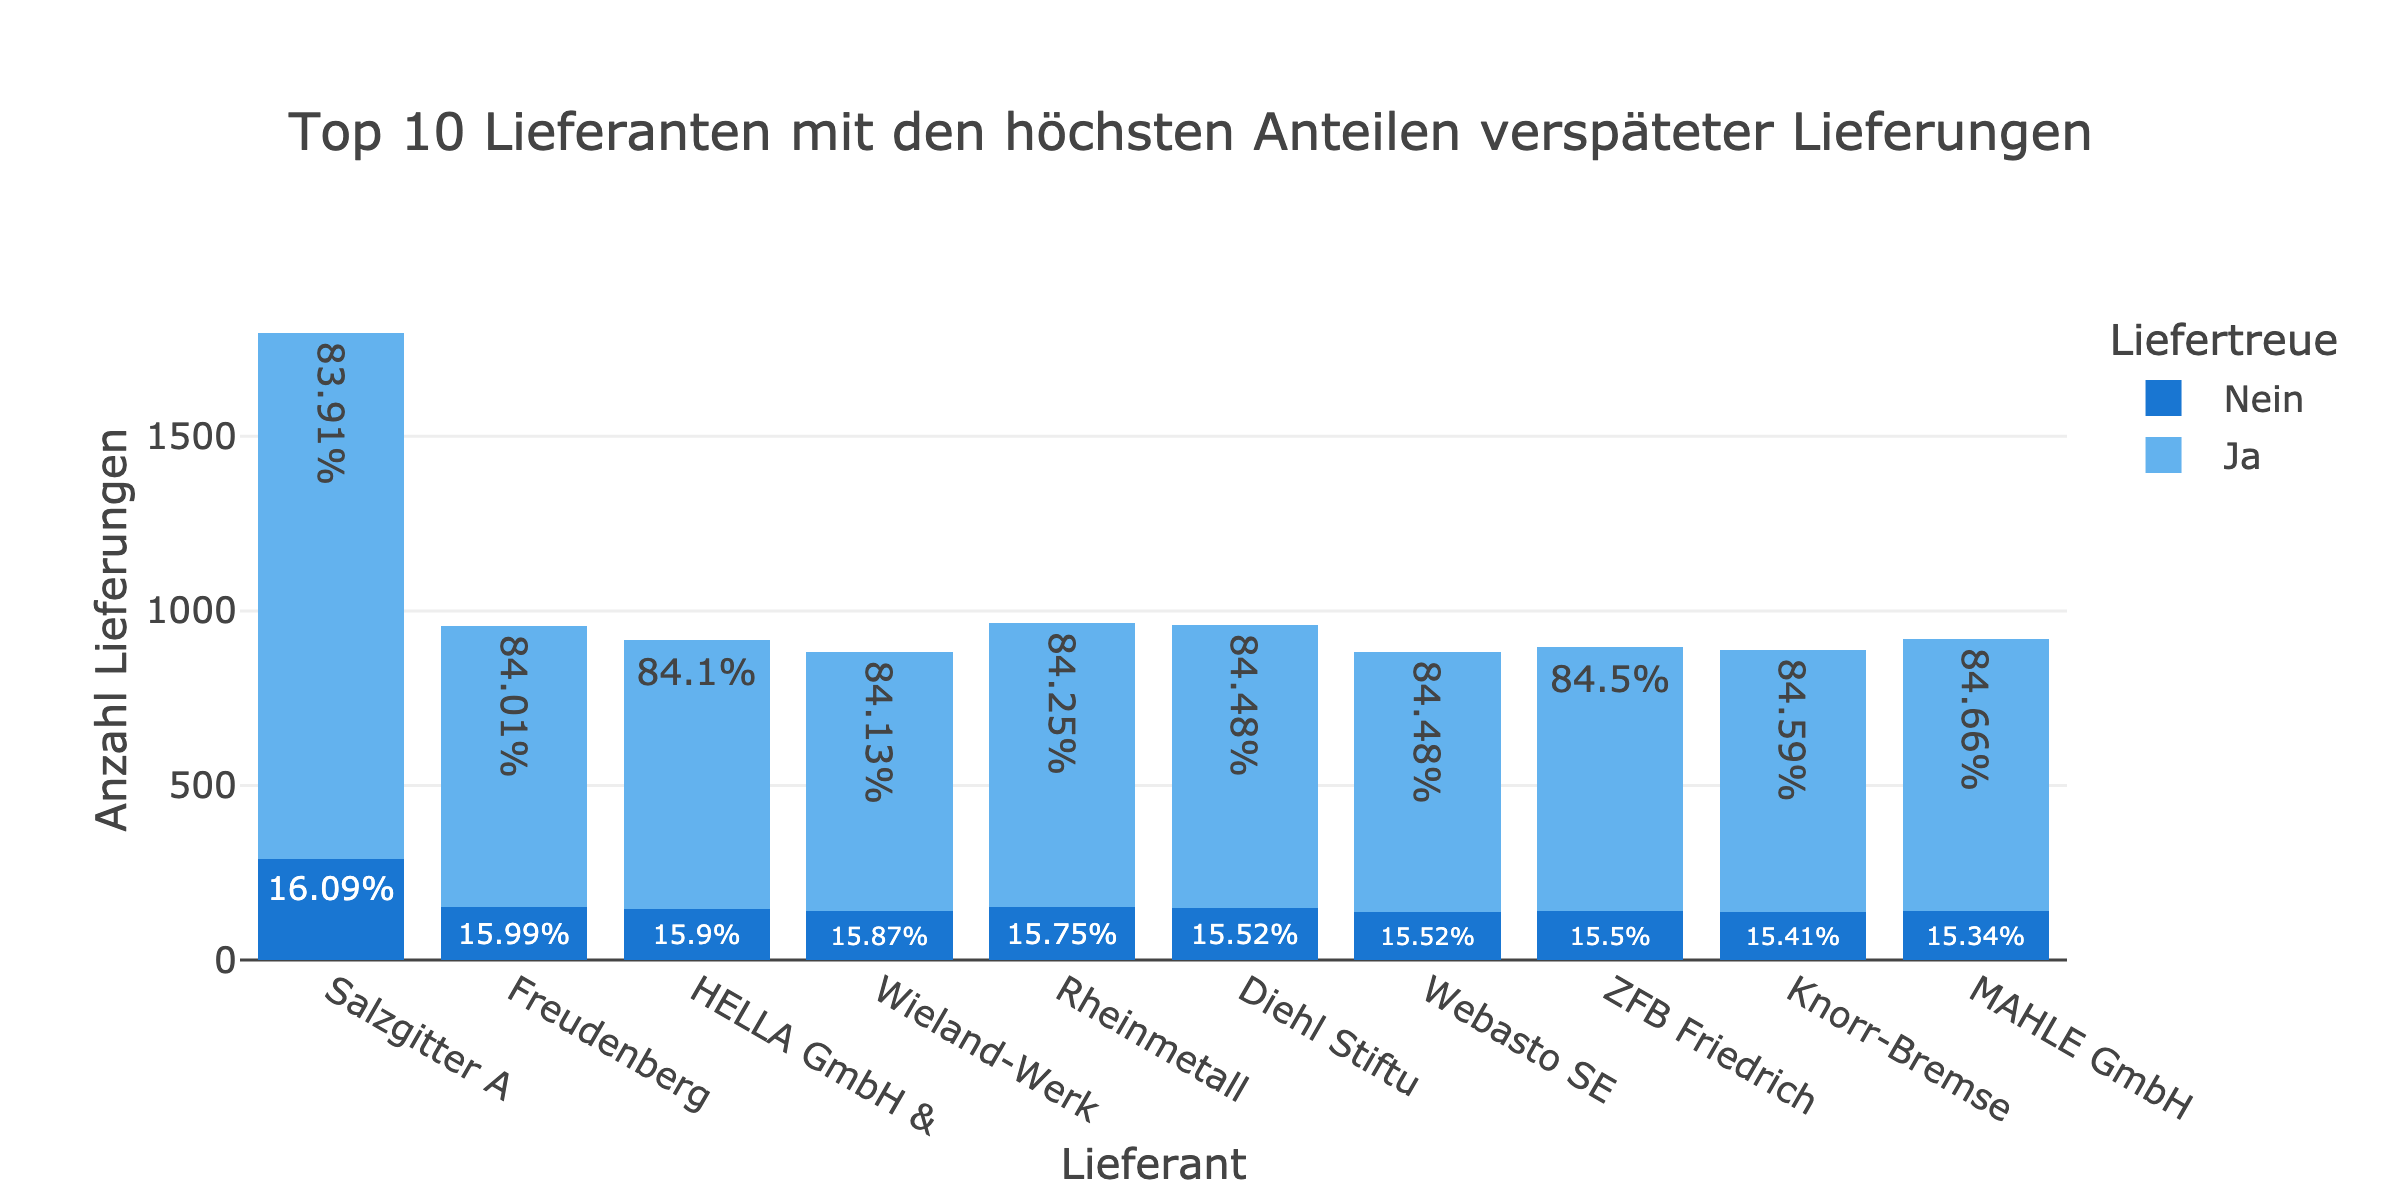

In [5]:
display(Image(filename="../reports/images/top10_liefertreuen_bar.png", width=600, height=200))

### Über- und Unterlieferungen nach Land

Die Grafik zeigt die größten Abweichungen bei Über- und Unterlieferungen pro Land. Deutschland (DE) hat mit **-8.090** die höchste Unterlieferung.


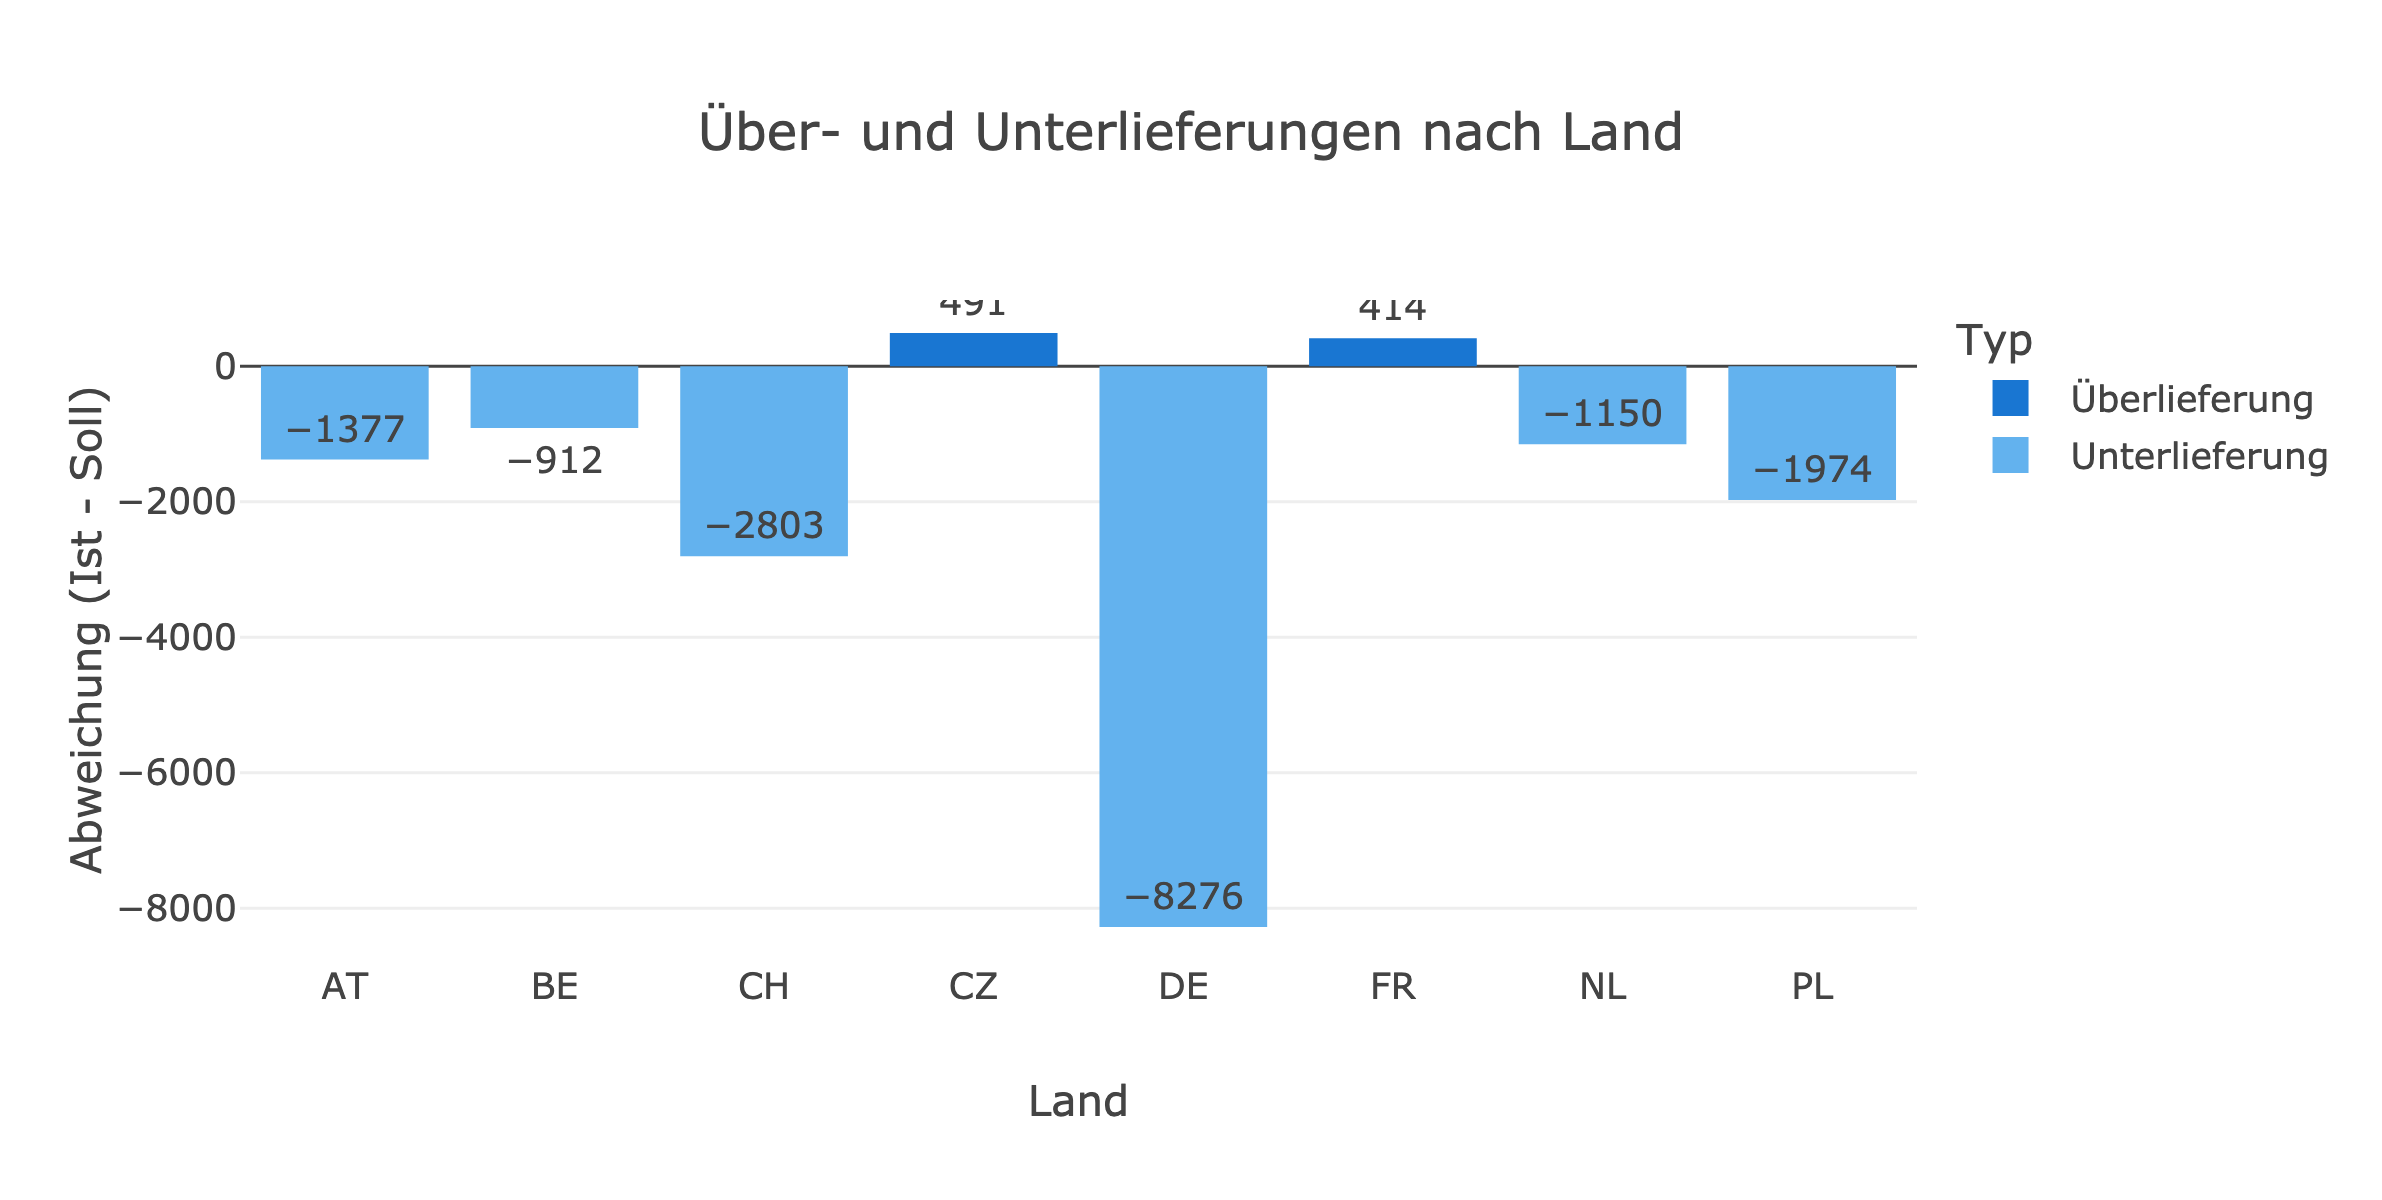

In [6]:
display(Image(filename="../reports/images/ueber_unterlieferung_land_bar.png", width=600, height=200))

## Methodologie

### **Modellauswahl:**  
Modellauswahl: Logistische Regression
- Zielvariable: liefertreue (Ja/Nein).
- Eingangsvariablen: soll_menge, we_menge, verspätungstage, land, termintreue.
- Datenaufteilung und MOdelltraining: 70% Training, 30% Testdaten. Numerische Variablen wurden standardisiert, und kategoriale Variablen wurden dummy-kodiert.

Modellleistung:
- Genauigkeit: 99,21%.
- Recall (Positiv): 100%.
- Präzision: 94,62%.

Einfluss der Variablen:
- verspätungstage (-12,81): Stärkster negativer Einfluss.
- we_menge (+0,018): Positiver Einfluss.
- Regionale Effekte: Schweiz (+0,043), Belgien (-0,038).

## Ergebnisse

### **Logistische Modell**

### **Konfusionmatrix**
Die Konfusionsmatrix gibt eine detaillierte Übersicht über die Leistung eines Klassifikationsmodells, indem sie die tatsächlichen und vorhergesagten Klassifikationen vergleicht.

Das Modell zeigt eine hohe Genauigkeit (99.21%), eine hohe Präzision (94.62%) und einen perfekten Recall (100%) für die positive Klasse. Es ist sehr gut darin, sowohl positive als auch negative Fälle korrekt zu klassifizieren, mit einer minimalen Anzahl an Fehlklassifikationen.

Das Modell hat eine hohe Anzahl von True Positives (1197) und True Negatives (7413), was auf eine sehr gute Vorhersageleistung hindeutet. Das bedeutet, dass 7413, die Fälle, die korrekt als negativ (z. B. “Nein”) klassifiziert wurden sind. 

### **Modellleistung:**  
 - **Genauigkeit (Testdaten):** 95 %
- Geringe Fehlerrate: Nur 68 von 8678 Fällen wurden falsch klassifiziert, was einer Accuracy von 99 % entspricht.
- Alle tatsächlichen positiven Fälle wurden korrekt erkannt (Recall = 100%). Das bedeutet, dass das Modell keine relevanten Fälle übersehen hat.

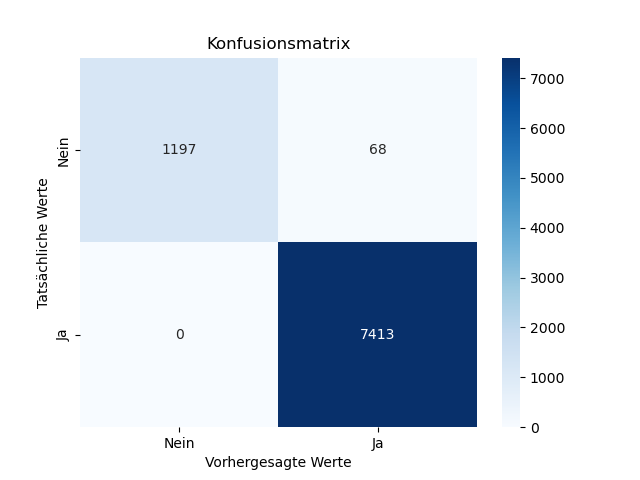

In [7]:
display(Image(filename="../reports/images/koeffizienten_liefertreue.png", width=600, height=200))

### **Einfluss der Features:**  

Bei der Chi-Quadrat-Test zwischen Liefertreue und Termintreue besteht ein signifikanter Zusammenhang zwischen den Variablen (p < 0.05).

Die Ergebnisse bestätigen, dass die Termintreue ein starker Prädiktor für die Liefertreue ist. Wenn eine Lieferung verspätet oder früh erfolgt, ist die Wahrscheinlichkeit für fehlende Liefertreue (Nein) signifikant höher. 

| **Metrik**              | **Ergebnis**                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------|
| **Chi-Quadrat-Statistik** | 28916.13 - Sehr hohe Abweichung zwischen den beobachteten und erwarteten Häufigkeiten.           |
| **p-Wert**               | 0.0 - Ein extrem signifikanter Zusammenhang zwischen `termintreue` und `liefertreue` (p < 0.05). |
| **Freiheitsgrade**       | 1 - Basierend auf der Größe der Kontingenztabelle.                                               |
| **Erwartete Häufigkeiten** | [[20930.92, 3674.08], [3674.08, 644.92]] - Frequenzen, die bei vollständiger Unabhängigkeit erwartet würden. |
| **Interpretation**       | Es besteht ein hoch signifikanter Zusammenhang zwischen den Variablen `termintreue` und `liefertreue`. Die Verteilung der Werte zeigt, dass die Termintreue eng mit der Liefertreue verknüpft ist. |

Ein negativer Koeffizient für die Verspätungstage bedeutet, dass mit jedem zusätzlichen Verspätungstag die Wahrscheinlichkeit für die Zielvariable (z. B. “Ja”) signifikant sinkt. Im Fall der logistischen Regression zeigt der Koeffizient von -12.808870, dass die Verspätungstage den stärksten negativen Einfluss auf die Zielvariable haben. Das bedeutet, dass pünktliche Lieferungen einen entscheidenden Beitrag zur Erreichung der Zielvariable leisten.

Andere negative Koeffizienten, wie etwa für Lieferungen aus Polen (land_PL, -0.000746), zeigen nur einen sehr geringen Einfluss, da der Wert nahe null liegt. Lieferungen aus Deutschland (land_DE, -0.024922) reduzieren die Wahrscheinlichkeit für die Zielvariable etwas stärker, während Lieferungen aus Belgien (land_BE, -0.038329) einen noch ausgeprägteren negativen Effekt haben.

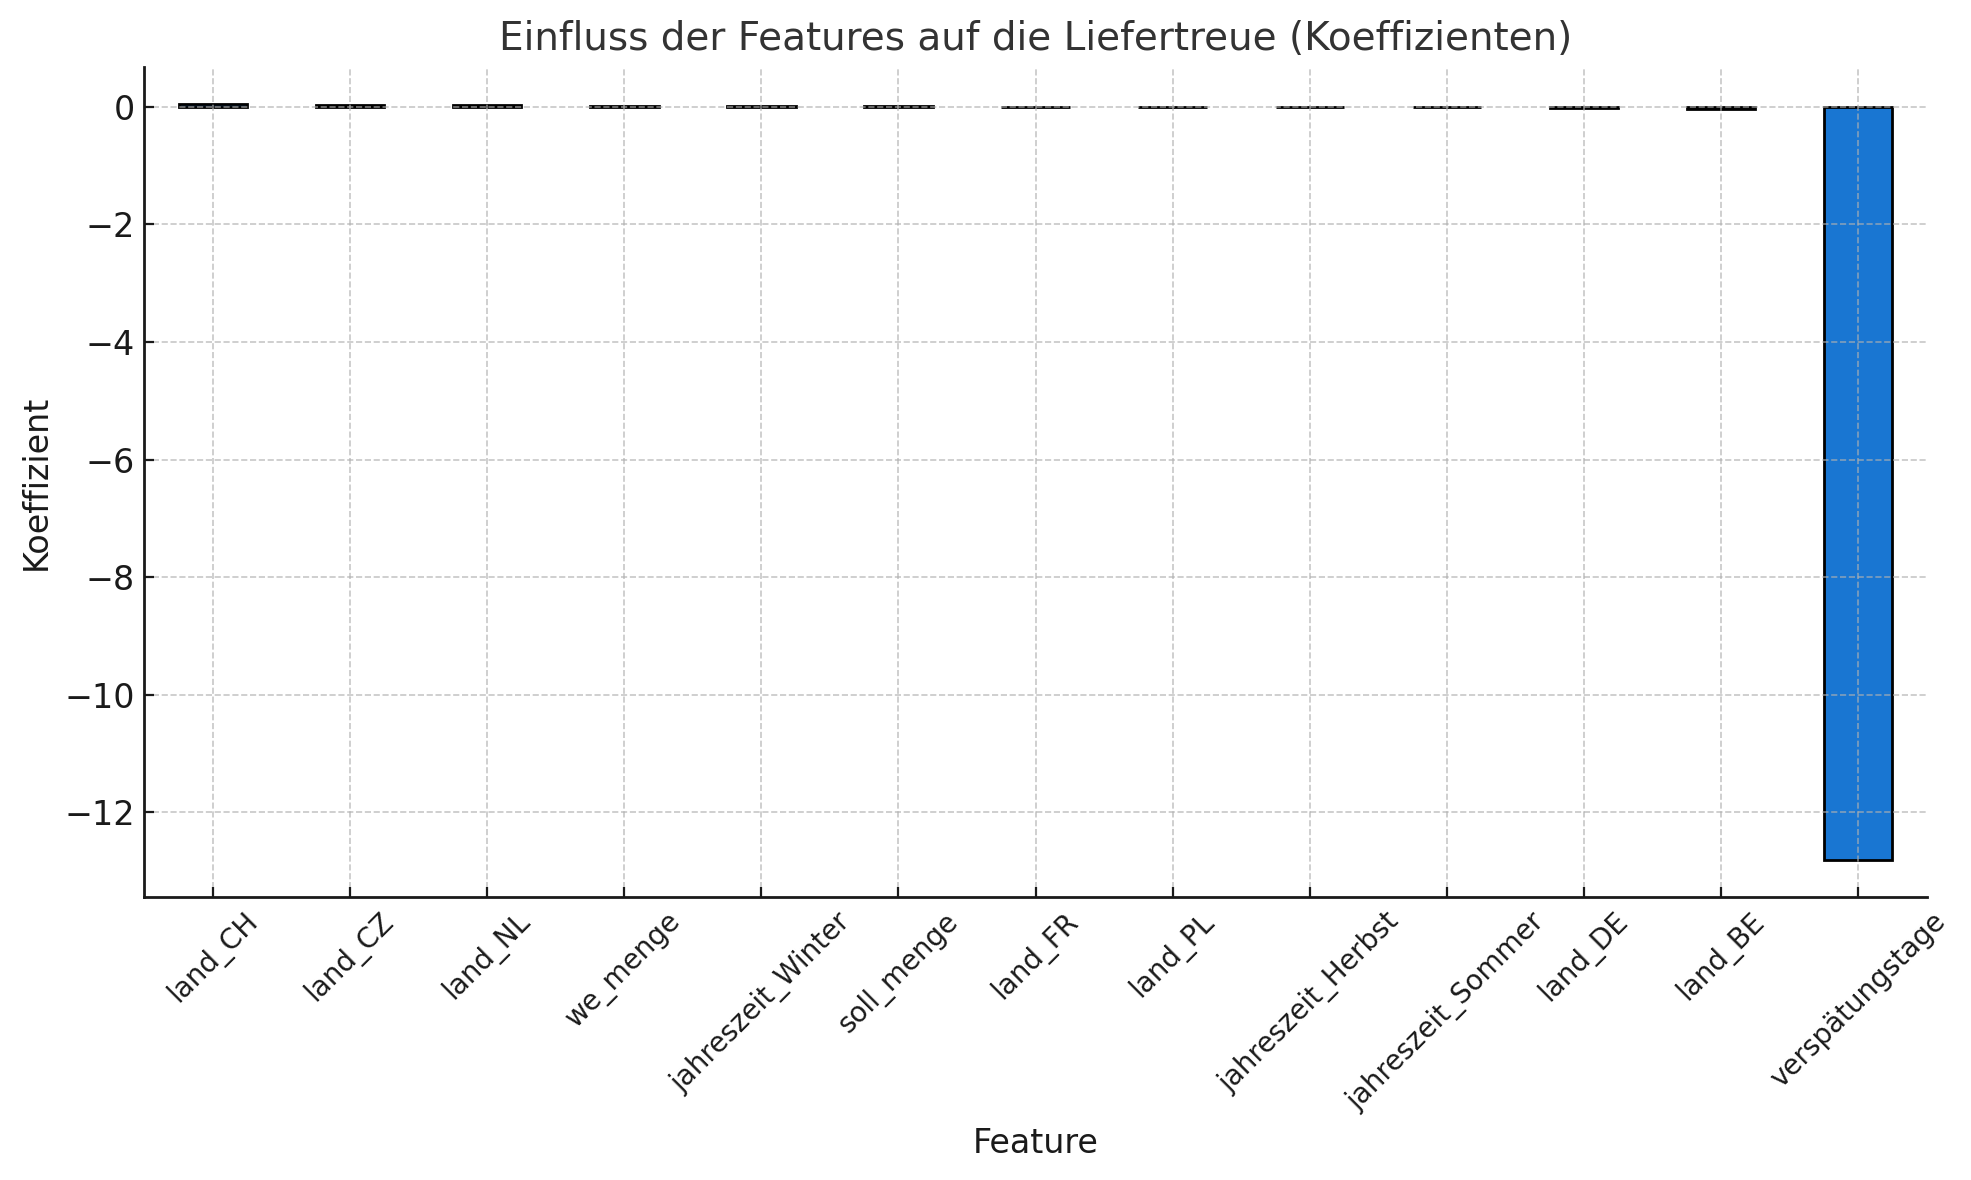

In [8]:
display(Image(filename="../reports/images/einfluss_features.png", width=600, height=200))

## **Diskussion und Handlungsempfehlungen**

- Die Ergebnisse zeigen, dass die Verspätungstage der wichtigste Faktor für die Liefertreue sind.
- Regionen wie die Schweiz (`land_CH`) und Tschechien (`land_CZ`) haben positive Effekte, während Deutschland (`land_DE`) und Belgien (`land_BE`) negative Einflüsse zeigen.

| **Feature**           | **Koeffizient** | **Einfluss**                                                                                 |
|------------------------|-----------------|---------------------------------------------------------------------------------------------|
| verspätungstage        | -12.81          | Stärkster negativer Einfluss. Jede zusätzliche Verspätungstag reduziert die Liefertreue stark. |
| we_menge               | 0.018           | Moderat positiver Einfluss. Höhere gelieferte Mengen verbessern die Wahrscheinlichkeit der Liefertreue. |
| soll_menge             | 0.011           | Gering positiver Einfluss. Größere Bestellungen korrelieren leicht mit besserer Liefertreue. |
| land_CH (Schweiz)      | 0.043           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_CZ (Tschechien)   | 0.037           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_NL (Niederlande)  | 0.034           | Leichter positiver Einfluss. Gute logistische Leistung.                                      |
| land_BE (Belgien)      | -0.038          | Leichter negativer Einfluss. Potenzielle regionale Herausforderungen.                       |
| land_DE (Deutschland)  | -0.025          | Leichter negativer Einfluss. Potenzielle regionale Herausforderungen.                       |
| jahreszeit_Winter      | 0.015           | Leichter positiver Einfluss. Möglicherweise bessere Planung in der Winterperiode.           |
| jahreszeit_Sommer      | -0.006          | Gering negativer Einfluss. Urlaubszeiten könnten Liefertreue leicht beeinträchtigen.         |
| jahreszeit_Herbst      | -0.001          | Minimal negativer Einfluss.                                                                 |

**Entscheidender Einflussfaktor: Verspätungstage**
 - Koeffizient: -12.81

Bedeutung:
 - Die verspätungstage (Tage der Verzögerung) haben mit Abstand den stärksten negativen Einfluss auf die Liefertreue.
 - Je mehr Tage eine Lieferung verspätet ist, desto geringer ist die Wahrscheinlichkeit, dass sie als “pünktlich” (Liefertreue = Ja) eingestuft wird.
 - Dieser starke negative Einfluss ist logisch, da Verspätungen ein klarer Indikator für fehlende Liefertreue sind.

**Handlungsempfehlung** 

Um die Liefertreue nachhaltig zu verbessern, sollten gezielte Maßnahmen in den folgenden Bereichen umgesetzt werden:
Handlungsempfehlungen:
1.	Verspätungen minimieren:
Lieferprozesse optimieren, häufig verspätete Lieferanten identifizieren, gezielte Maßnahmen umsetzen.
2.	Regionale Maßnahmen:
Fokus auf Regionen mit negativen Effekten (z. B. Deutschland, Belgien).
3.	Saisonale Planung:
Effizientere Planung in Sommermonaten zur Minimierung saisonaler Schwankungen.
4.	Mengenplanung:
Sicherstellung vollständiger Lieferungen durch verbesserte Überwachung und Planung.

Die Liefertreue ist ein entscheidender Erfolgsfaktor in der Automobilindustrie. Die Ergebnisse zeigen, dass verspätete Lieferungen, Mengenabweichungen und regionale Unterschiede die Zuverlässigkeit der Lieferkette signifikant beeinflussen. Eine stärkere Priorisierung und Optimierung dieser Aspekte ist unabdingbar.

In [9]:
!jupyter nbconvert --to html report_14.01.2025.ipynb

[NbConvertApp] Converting notebook report_14.01.2025.ipynb to html
[NbConvertApp] Writing 1582627 bytes to report_14.01.2025.html
